<a href="#E9MJU4na3gDQ" target="_self">
<button>Ir para Aula 9</button>
</a>

# Aula 07: Análise Exploratória para Modelagem    

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---

# Importar Dataset - Automobile Data Set
**Fonte:** https://archive.ics.uci.edu/dataset/10/automobile


In [42]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

automobile = fetch_ucirepo(id=10)

# Criar Dataframe

In [43]:
import pandas as pd

df = automobile.data.features

display(df.head(3))

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN


In [44]:
#  Carregamento e Diagnóstico

In [45]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

None

In [46]:
display(df.describe())

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000


In [47]:
display(df.isnull().sum())

,0
price,4
highway-mpg,0
city-mpg,0
peak-rpm,2
horsepower,2
compression-ratio,0
stroke,4
bore,4
fuel-system,0
engine-size,0


In [48]:
# excluir a coluna normalized-losses pois ela tem muitos valores nulos
df = df.drop('normalized-losses', axis=1)
display(df.head())

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,65.5,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,66.2,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,66.4,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi


In [49]:
# excluir as linhas que ainda possuem valores nulos
df = df.dropna()
display(df.head())

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,width,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,64.1,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,65.5,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,66.2,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,66.4,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi


In [50]:
# verificar se a limpeza foi realizada cm sucesso
display(df.isnull().sum())

,0
price,0
highway-mpg,0
city-mpg,0
peak-rpm,0
horsepower,0
compression-ratio,0
stroke,0
bore,0
fuel-system,0
engine-size,0


# Análise da Variável-Alvo ( price )

In [51]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Count'>

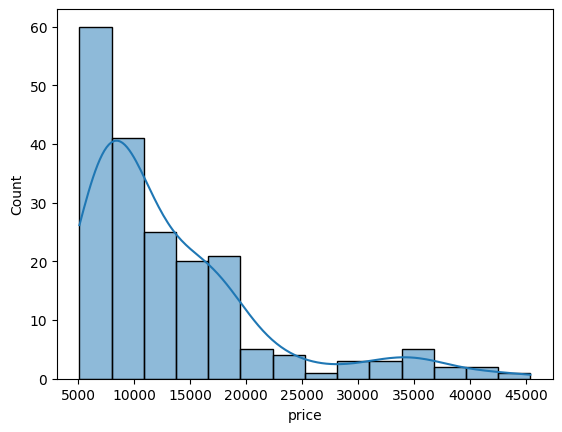

In [52]:
sns.histplot(df['price'], kde=True)

## Interpretação do gráfico acima

O preço médio dos carros é entre 0 e 1. No geral, os preços tendem a ficar ou na média ou acima dela. Sabemos disso pois o gráfico mostra uma assimétria que tende aos valores positivos.

---

### Pergunta para Reflexão:
- A distribuição dos preços é simétrica? Ou é 'puxada' para um dos lados (assimetria)? Isso pode afetar nosso modelo de regressão?

**Resp.:** Não é simétrica. Ela puxa bem mais para o lado positivo (+2 e +3) do que para o lado negativo (-1 e -2). Isso poderia afetar nosso modelo, fazendo com que ele preveja valores mais altos do que o ideal, mas como a assimetria não é gigante, acreditamos que isso não será um problema muito sério nesse caso, mas sim, assimetrias como essa podem acarretar em sérios problemas em modelos de regressão.

---

# Relação entre Variáveis Categóricas e o Preço

/tmp/ipython-input-3674290634.py:4: UserWarning: 
The palette list has fewer values (6) than needed (178) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='horsepower', hue='price', data=df, palette=['red', 'orange', 'yellow', 'blue', 'green', 'pink'])
/tmp/ipython-input-3674290634.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


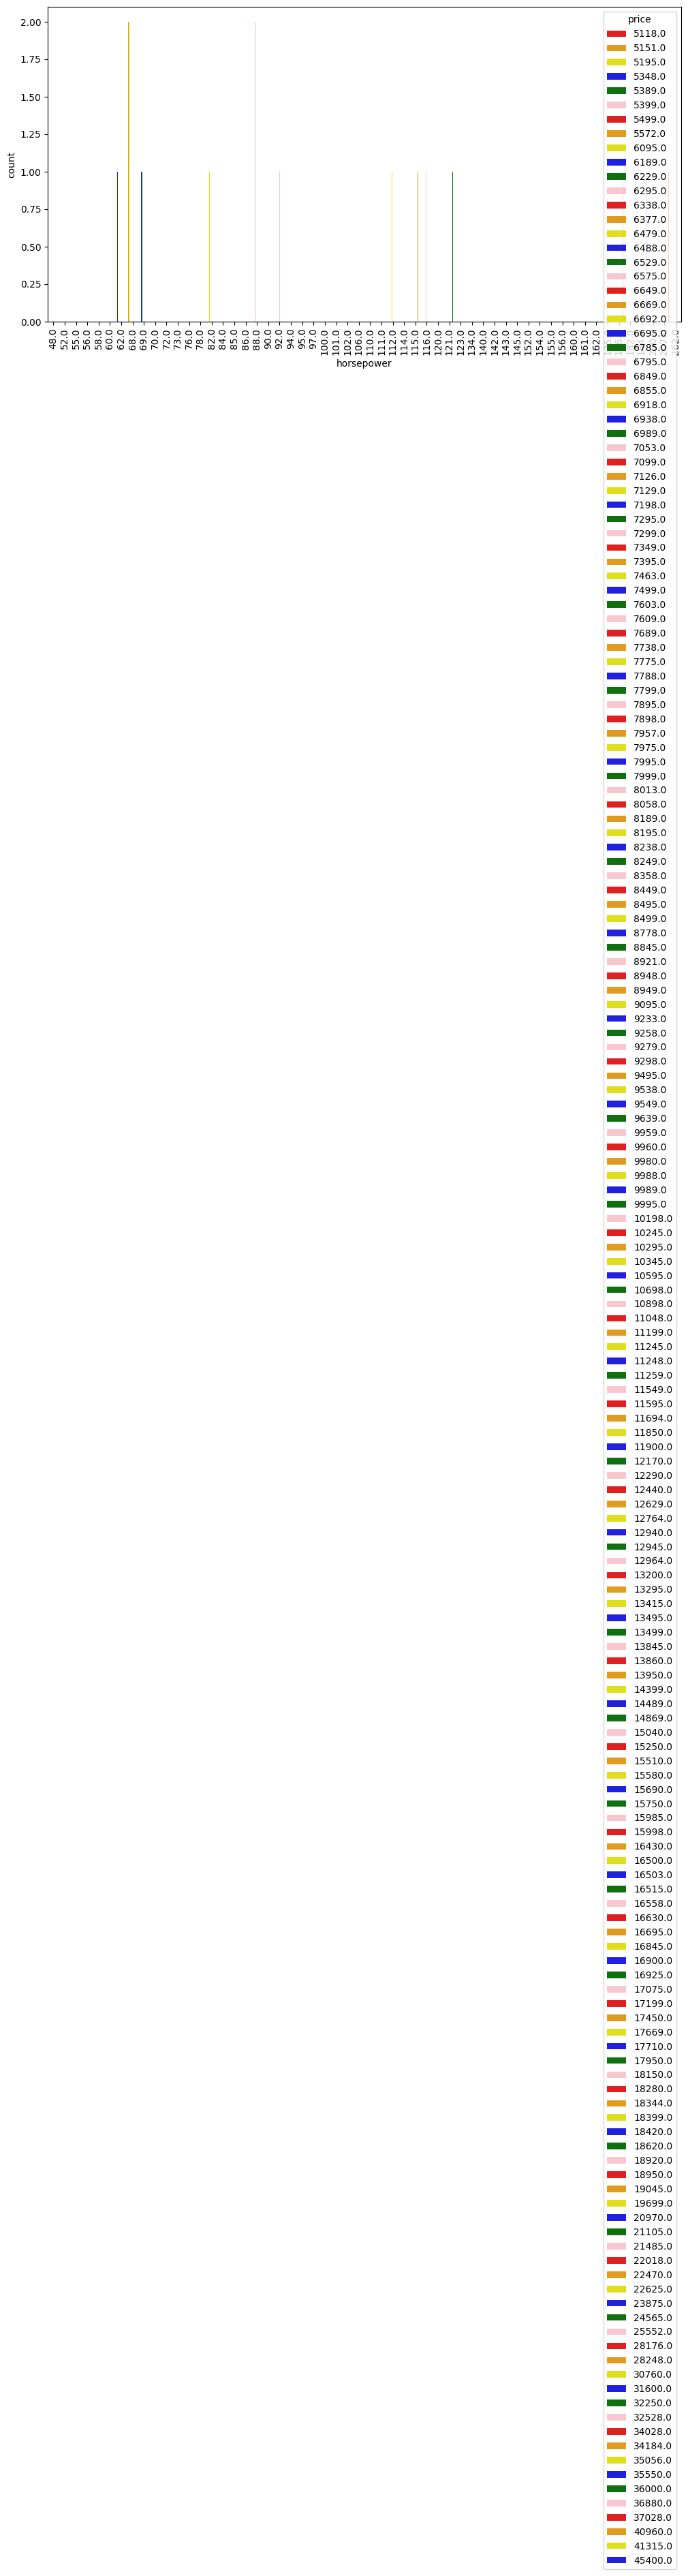

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='horsepower', hue='price', data=df, palette=['red', 'orange', 'yellow', 'blue', 'green', 'pink'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Interpretação do gráfico acima

O gráfico nos mostra que, carros com o preço 3 geralmente tem um motor mais potente, mas no geral, a correlação entre potência e preço não é muito clara. A correlação mais visível nesse gráfico é que nosso dataset possui muito mais carros com poucos cavalos do que com muitos cavalos.

---

/tmp/ipython-input-3927334372.py:4: UserWarning: 
The palette list has fewer values (6) than needed (178) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='highway-mpg', hue='price', data=df, palette=['red', 'orange', 'yellow', 'blue', 'green', 'pink'])
/tmp/ipython-input-3927334372.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


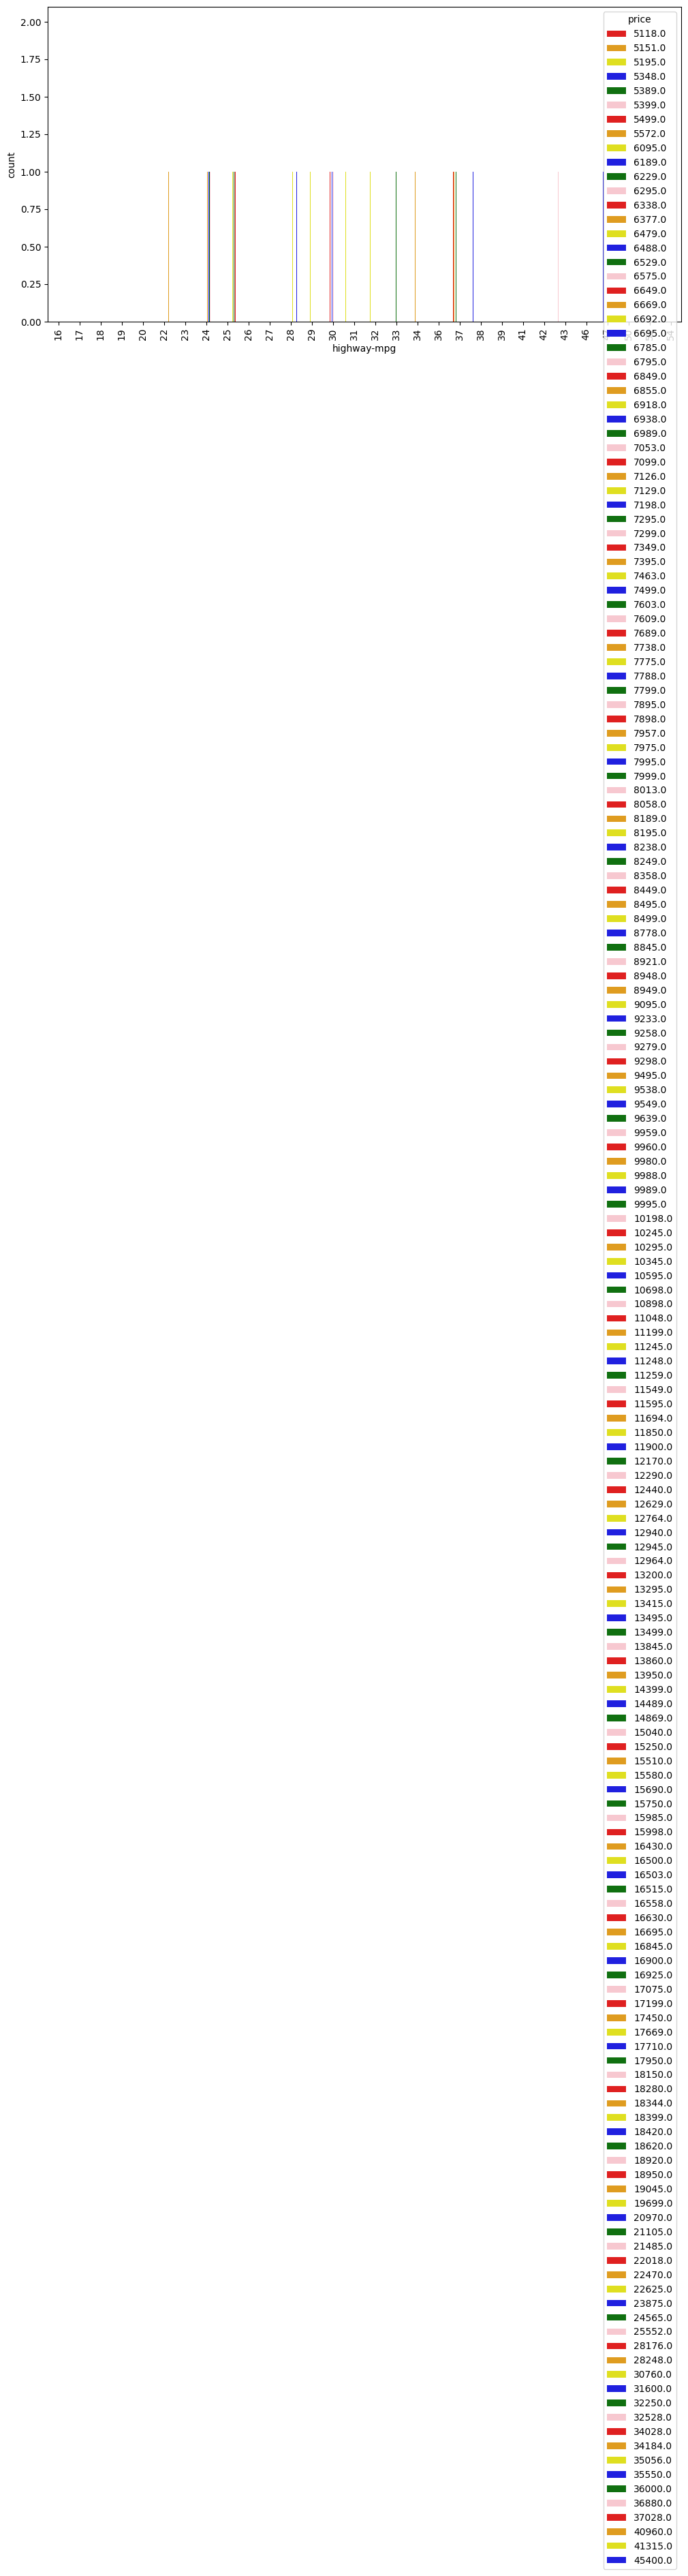

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='highway-mpg', hue='price', data=df, palette=['red', 'orange', 'yellow', 'blue', 'green', 'pink'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Interpretação do gráfico acima

O gráfico nos mostra que, carros com preço 3 tendem a ter consumos piores, isso bate com o gráfico anteior, que mostrava que esses mesmos carros tendem a ter motores mais potentes.

---

### Pergunta para Reflexão
- A relação entre potência e preço parece ser linear? E a relação entre consumo e preço? Qual delas parece ser uma correlação positiva e qual parece ser negativa?

**Resp.:** A relação entre potência e preço não é fortemente linear, mas é possível perceber uma leve tendência à preços mais elevados em carros com mais potência. Já a relação entre consumo e preço é mais clara, mas defitivamente não é linear, o gráfico nos mostra que os carros muito caros tendem a ter consumos piores, já os carros com preços próximos a média de preço tem consumos melhores, enquanto carros abaixo da média tendem a ter consumos um pouco piores.

---

# Relação entre Variáveis Numéricas e o Preço

<Axes: xlabel='price', ylabel='make'>

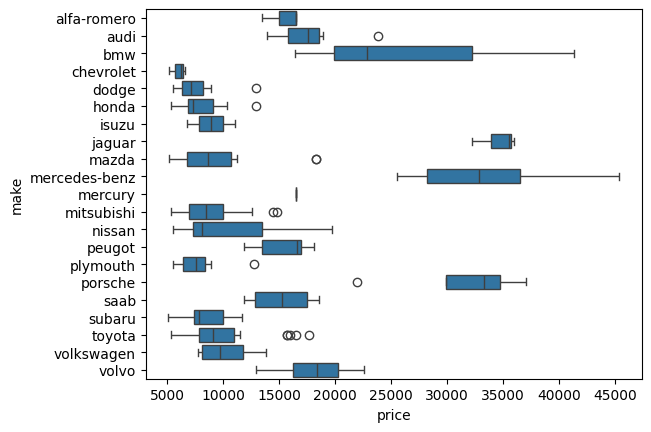

In [55]:
sns.boxplot(x='price', y='make', data=df)

## Interpretação do gráfico acima

O gráfico nos mostra várias coisas interessantes, por exemplo, a montadora toyota tem carros muito baratos e carros muito caros, com várias opções em quase todas as faixas de preço, enquanto por exemplo a Mercedes, costuma fazer carros com preços dentro da média, mas possui modelos (outliers) com valores extremamente elevados.

---

<Axes: xlabel='price', ylabel='body-style'>

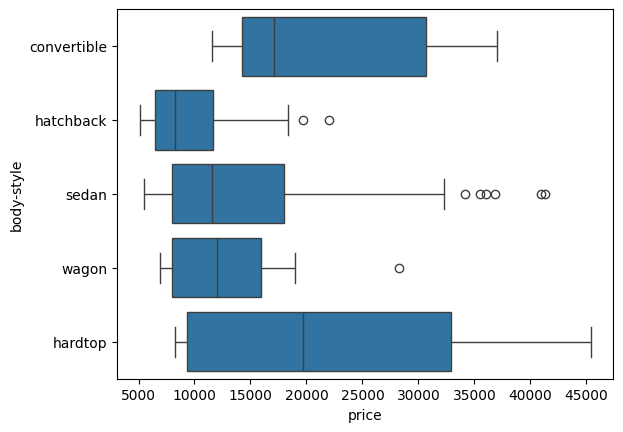

In [56]:
sns.boxplot(x='price', y='body-style', data=df)

## Interpretação do gráfico acima

O gráfico acima nos motra que, em média, os carros mais baratos são do tipo "Wagon", mas, se você estiver buscando o carro mais barato de todos, a reposta está no "Sedan", devido aos outliers. O gráfico também mostra que quase todos os conversíveis são extremamente caros.

---

### Pergunta para Reflexão

- Quais fabricantes de carro têm a mediana de preço mais alta? A variabilidade de preços (tamanho da caixa do boxplot) é a mesma para todos os fabricantes?

**Resp.:** As fabricantes "Saab" e "Alfa Romeo" tem as medianas de preços mais altas. Não, a variabilidade não é a mesma para todas, fabricantes como a "Mitsubishi", "Toyota" e "Mercedes Benz" tem variabilidades mais altas, enquanto "Volkswagen" e "BMW" tem variabilidades bem baixas.

---

# Visão Geral com Heatmap

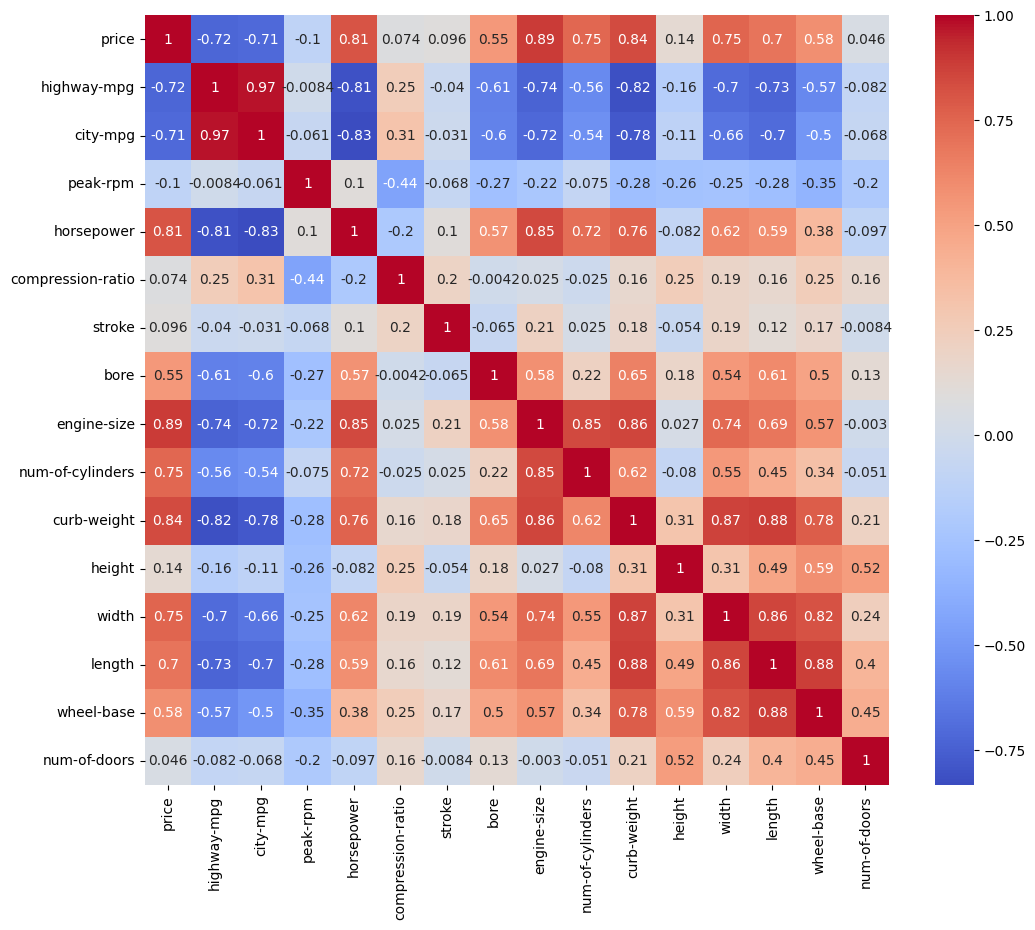

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Interpretação do gráfico acima

O gráfico indica várias correlações extremamente interessantes, mas poucas que são relevantes para a nossa métrica alvo. A única variável que tem uma correlação relevante com a métrica alvo preço é o pico máximo de rotações "peak-rpm"

---

# Conclusão

- Com base nesta análise, quais são as 3 a 5 variáveis mais promissoras que você escolheria para treinar um modelo? Justifique sua escolha com base nos gráficos

**Resp.:**
- Fabricante: Pois nos traz informações precisas sobre as faixas de preço dos carros que ela produz.
- Tipo do carro: Pois, parecido com o fabricante, nos traz informações precisas sobre o que esperar do preço de um carro. Por exemplo, conversíveis são sempre caros.
- KM por litro: Baseado no heatmap e countplot, conseguimos ver uma relação que, por mais que fraca, ainda existe e pode nos guiar a melhores resultados.
- Pico de Rotações: O heatmap nos mostra uma clara relação entre peak-rpm e o preço dos carros.
- Horsepower: Parecido com o KM por Litro, a quantidade de cavalos possui uma relação fraca mas existente.

---
---
---

# Aula 09: Modelagem para Regressão

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---

# Parte 1: Preparação dos Dados para Regressão

## Importar Dataset - Automobile Data Set
**Fonte:** https://archive.ics.uci.edu/dataset/10/automobile

In [58]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

automobile = fetch_ucirepo(id=10)

## Criar Dataframe

In [59]:
import pandas as pd

df = automobile.data.features

display(df.head(3))

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN


---

* Com base na sua conclusão do Aula 07, crie uma lista com os nomes das colunas que você considera mais importantes:

### Lista de variáveis promissoras a partir da análise gráfica no EDA:

* curb-weight
* engine-size
* horsepower
* width
* length
* num-of-cylinders
* wheel-base

In [60]:
features = ["curb-weight", "engine-size", "horsepower", "width", "length", "num-of-cylinders", "wheel-base"]
target = "price"

x = df[features]
y = df[target]

display(x.head(3))
display(y.head(3))

,curb-weight,engine-size,horsepower,width,length,num-of-cylinders,wheel-base
0,2548,130,111.0,64.1,168.8,4,88.6
1,2548,130,111.0,64.1,168.8,4,88.6
2,2823,152,154.0,65.5,171.2,6,94.5


,price
0,13495.0
1,16500.0
2,16500.0


## Codificação de Variáveis Categóricas

In [61]:
x_encoded = pd.get_dummies(x, drop_first=True)


display(x_encoded.head(3))
display(y.head(3))

print("Shape original de X:")
display(x.shape)
print("--------------")
print("Shape tratato de X:")
display(x_encoded.shape)

x = x_encoded

,curb-weight,engine-size,horsepower,width,length,num-of-cylinders,wheel-base
0,2548,130,111.0,64.1,168.8,4,88.6
1,2548,130,111.0,64.1,168.8,4,88.6
2,2823,152,154.0,65.5,171.2,6,94.5


,price
0,13495.0
1,16500.0
2,16500.0


Shape original de X:


(205, 7)

--------------
Shape tratato de X:


(205, 7)

## Pontos de Parada para Discussão em Dupla (Reflexão)

1. Na nossa EDA, quais variáveis mostraram a relação linear mais forte com o preço em um scatter plot? Por que elas são candidatas ideais para um modelo de Regressão Linear?               
**Resp.:** curb-weight e engine-size. São bons candidatos pois tem uma forte relação com a variável alvo "preço". Ou seja, são ótimas indicadoras do preço.


2. Variáveis como  make  (fabricante) são muito importantes, mas têm muitas categorias (mais de 20). Usar  get_dummies  aqui criará muitas colunas novas. Que impacto isso pode ter no nosso modelo? (Introduz a ideia de 'dimensionalidade').                       
**Resp.:** A alta dimensionalidade aumenta muito a complexidade do modelo, deixando ele mais sucetível à overfitting.


# Parte 2: Treinamento e Avaliação de um Modelo de Regressão

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.model_selection import train_test_split

# limpar
df_cleaned = df.dropna()

features = ["curb-weight", "engine-size", "horsepower", "width", "length", "num-of-cylinders", "wheel-base"]
target = "price"

x = df_cleaned[features]
y = df_cleaned[target]

# Separar os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape de x_train:", x_train.shape)
print("Shape de x_test:", x_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de x_train: (127, 7)
Shape de x_test: (32, 7)
Shape de y_train: (127,)
Shape de y_test: (32,)


In [64]:
# --- 1. Criando e Treinando o Modelo ---
modelo_regressao = LinearRegression()
modelo_regressao.fit(x_train, y_train)

LinearRegression()

In [65]:
# --- 2. Fazendo Previsões nos Dados de Teste ---
previsoes = modelo_regressao.predict(x_test)

In [66]:
# --- 3. Avaliando o Desempenho ---
mse = mean_squared_error(y_test, previsoes)
rmse = np.sqrt(mse)

print(f"\nO Erro Quadrático Médio (MSE) do modelo foi: {mse:.2f}")
print(f"A Raiz do Erro Quadrático Médio (RMSE) do modelo foi: {rmse:.2f}")


O Erro Quadrático Médio (MSE) do modelo foi: 6169332.34
A Raiz do Erro Quadrático Médio (RMSE) do modelo foi: 2483.81


# Parte 3: Interpretando os Resultados e o Erro do Modelo

In [67]:
# Para entender se o RMSE é alto ou baixo, vamos compará-lo
# com a média e o desvio padrão do preço.
media_preco = df['price'].mean()
desvio_padrao_preco = df['price'].std()

print(f"Preço médio dos carros no dataset: ${media_preco:.2f}")
print(f"Desvio padrão dos preços: ${desvio_padrao_preco:.2f}")
print(f"RMSE do nosso modelo: ${rmse:.2f}")

Preço médio dos carros no dataset: $13207.13
Desvio padrão dos preços: $7947.07
RMSE do nosso modelo: $2483.81


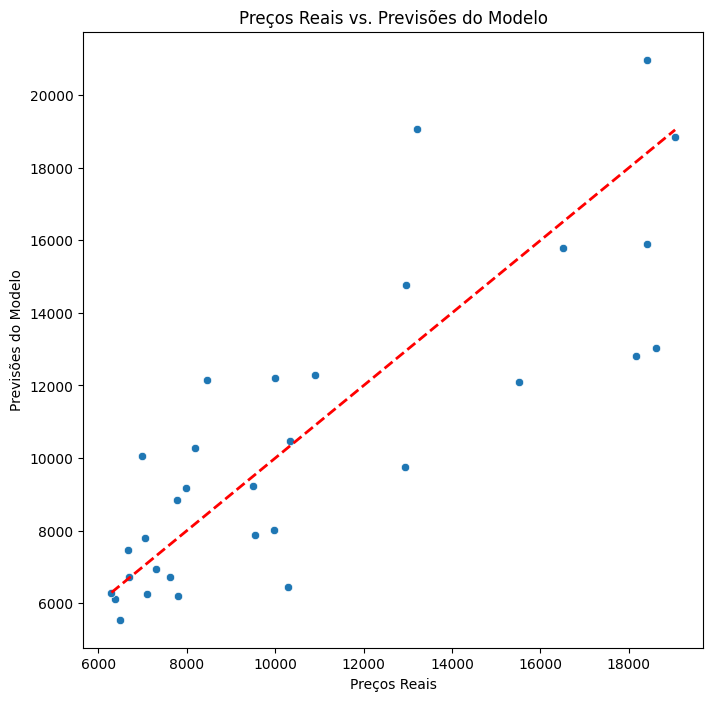

In [68]:
# Visualizando as previsões vs. os valores reais
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=previsoes)
plt.xlabel("Preços Reais")
plt.ylabel("Previsões do Modelo")
plt.title("Preços Reais vs. Previsões do Modelo")
# Adicionando uma linha de referência: se o modelo fosse perfeito, todos os
# pontos estariam nesta linha
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

## Pontos de Parada para Discussão em Dupla (Reflexão)

1. Nosso RMSE de USD XXXX é grande ou pequeno em comparação com o preço médio dos carros? Se o preço médio é  USD 13.000  e nosso erro médio é  USD 3.000 , o que isso diz sobre a utilidade do nosso modelo?              
**Resp.:** Nosso RMSE é de aproximadamente 2500 doláres. O nosso RMSE representa próximo de 18% do valor médio dos carros. Nós consideramos isso um valor médio. Definitivamente não é pequeno, mas também não é grande.
Isso diz que o modelo é útil mas não é perfeito, pode ser melhorado.


2. Olhando o gráfico de "Preços Reais vs. Previsões", os pontos estão próximos da linha vermelha? Onde o modelo parece errar mais: em carros baratos ou em carros caros? O que isso nos diz sobre as limitações do nosso modelo?       
**Resp.:** Não estão próximos. Isso nos diz que temos uma taxa de erro e variabilidade grande. O modelo erra mais em carros caros, até carros de USD 8000 o modelo vai bem, depois disso se perde bastante. Isso nos diz que o nosso modelo é mal distribuido, ele consegue prever bem o preço de carros baratos mas tem dificuldade com carros mais caros.

# Relatório de Conclusão

Um parágrafo explicando:
As features que foram escolhidas e por quê.
O que é o RMSE e o que o valor obtido significa no contexto do problema (ex: "Nosso modelo tem um erro médio de $XXXX ao
prever o preço de um carro").
Uma breve análise sobre a performance do modelo com base no gráfico de dispersão.

**Resp.:** Escolhemos as features a partir da análise do heatmap da aula passada. O RMSE é a dispersão média do modelo em relação ao preço real dos carros. A análise do nosso modelo nos mostrou que ele é um modelo mediano, não é super preciso, mas consegue fazer o trabalho.